## Day 4 Session 4

It Consist's of all the programs from Day 4 Session 4.

In [6]:
import pandas as pd
import numpy as np
import os
import datetime

print("--- Step 1: Simulating Telemetry Data ---")

# Simulated telemetry content (CSV format as string)
# Each row is a sensor reading with timestamp, ID, value, unit, and status
telemetry_data_content = """Timestamp,Sensor_ID,Value,Unit,Status
2025-07-01 08:00:00,TEMP_ENGINE,85.2,C,OK
2025-07-01 08:00:00,PRES_FUEL,101.5,kPa,OK
2025-07-01 08:01:00,TEMP_ENGINE,85.5,C,OK
2025-07-01 08:01:00,FLOW_COOLANT,12.3,LPM,OK
2025-07-01 08:02:00,TEMP_ENGINE,85.1,C,WARNING
2025-07-01 08:02:00,PRES_FUEL,nan,kPa,ERROR
2025-07-01 08:03:00,FLOW_COOLANT,12.5,LPM,OK
2025-07-01 08:03:00,HUMIDITY_CABIN,60.1,%,OK
2025-07-01 08:04:00,TEMP_ENGINE,86.0,C,OK
2025-07-01 08:04:00,PRES_FUEL,101.7,kPa,OK
2025-07-02 08:00:00,TEMP_ENGINE,87.0,C,OK
2025-07-02 08:00:00,PRES_FUEL,102.0,kPa,OK
2025-07-02 08:01:00,TEMP_ENGINE,87.3,C,ERROR
2025-07-02 08:01:00,FLOW_COOLANT,12.8,LPM,OK
2025-07-02 08:02:00,PRES_FUEL,102.5,kPa,OK
2025-07-02 08:02:00,HUMIDITY_CABIN,62.5,%,OK
"""

# File name to save the CSV
file_name = "telemetry_data.csv"

# Write the CSV content to a file
with open(file_name, "w") as f:
    # Replace 'nan' as string with actual numpy NaN so pandas can recognize it
    f.write(telemetry_data_content.replace('nan', str(np.nan)))

print(f"✅ Dummy telemetry data saved to '{file_name}'.")


--- Step 1: Simulating Telemetry Data ---
✅ Dummy telemetry data saved to 'telemetry_data.csv'.


In [2]:
print("\n--- Step 2: Loading Data with Pandas ---")

# Try loading the CSV file using pandas
try:
    df_raw_telemetry = pd.read_csv(file_name)
    print(f"✅ File '{file_name}' loaded successfully into a DataFrame.")
except FileNotFoundError:
    print(f"❌ Error: '{file_name}' not found. Make sure it's in the current folder.")
    # Fall back to an empty DataFrame for demo (not recommended in production)
    df_raw_telemetry = pd.DataFrame()

# --- Inspect the loaded data ---

# Display the first 5 rows
print("\n🔎 First 5 rows of data:")
print(df_raw_telemetry.head())

# Show column types and non-null counts
print("\nℹ️ DataFrame Info:")
df_raw_telemetry.info()

# Show how many missing values each column has
print("\n📉 Missing Values Count per Column:")
print(df_raw_telemetry.isnull().sum())




--- Step 2: Loading Data with Pandas ---
✅ File 'telemetry_data.csv' loaded successfully into a DataFrame.

🔎 First 5 rows of data:
             Timestamp     Sensor_ID  Value Unit   Status
0  2025-07-01 08:00:00   TEMP_ENGINE   85.2    C       OK
1  2025-07-01 08:00:00     PRES_FUEL  101.5  kPa       OK
2  2025-07-01 08:01:00   TEMP_ENGINE   85.5    C       OK
3  2025-07-01 08:01:00  FLOW_COOLANT   12.3  LPM       OK
4  2025-07-01 08:02:00   TEMP_ENGINE   85.1    C  WARNING

ℹ️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  16 non-null     object 
 1   Sensor_ID  16 non-null     object 
 2   Value      15 non-null     float64
 3   Unit       16 non-null     object 
 4   Status     16 non-null     object 
dtypes: float64(1), object(4)
memory usage: 772.0+ bytes

📉 Missing Values Count per Column:
Timestamp    0
Sensor_ID

In [3]:
print("\n--- Step 3: Data Cleaning and Preprocessing ---")

# Make a copy so original data is preserved
df_telemetry_cleaned = df_raw_telemetry.copy()

# Step 3.1: Convert 'Timestamp' column to datetime
df_telemetry_cleaned['Timestamp'] = pd.to_datetime(df_telemetry_cleaned['Timestamp'])
print("✅ Step 3.1: 'Timestamp' column converted to datetime.")
print("   ➤ New type:", df_telemetry_cleaned['Timestamp'].dtype)

# Step 3.2: Set 'Timestamp' as index
df_telemetry_cleaned.set_index('Timestamp', inplace=True)
print("\n✅ Step 3.2: 'Timestamp' set as the DataFrame index.")
print("   ➤ Here's how the top rows look now:")
print(df_telemetry_cleaned.head())

# Step 3.3: Convert 'Value' to numeric (handle missing or invalid entries)
df_telemetry_cleaned['Value'] = pd.to_numeric(df_telemetry_cleaned['Value'], errors='coerce')
print("\n✅ Step 3.3: 'Value' column converted to numeric (non-numeric replaced with NaN).")

# Step 3.4: Fill missing values in 'Value' with the column's average
mean_value = df_telemetry_cleaned['Value'].mean()
df_telemetry_cleaned['Value'].fillna(mean_value, inplace=True)
print(f"\n✅ Step 3.4: Missing values in 'Value' filled with average: {mean_value:.2f}")

# Step 3.5: Convert 'Status' and 'Unit' to categorical (memory-efficient for repeated text)
df_telemetry_cleaned['Status'] = df_telemetry_cleaned['Status'].astype('category')
df_telemetry_cleaned['Unit'] = df_telemetry_cleaned['Unit'].astype('category')
print("\n✅ Step 3.5: 'Status' and 'Unit' converted to categorical type.")

# Summary of the cleaned data
print("\n📋 Cleaned DataFrame Overview:")
df_telemetry_cleaned.info()

# Double-check if any missing values still exist
print("\n🔍 Remaining Missing Values:")
print(df_telemetry_cleaned.isnull().sum())



--- Step 3: Data Cleaning and Preprocessing ---
✅ Step 3.1: 'Timestamp' column converted to datetime.
   ➤ New type: datetime64[ns]

✅ Step 3.2: 'Timestamp' set as the DataFrame index.
   ➤ Here's how the top rows look now:
                        Sensor_ID  Value Unit   Status
Timestamp                                             
2025-07-01 08:00:00   TEMP_ENGINE   85.2    C       OK
2025-07-01 08:00:00     PRES_FUEL  101.5  kPa       OK
2025-07-01 08:01:00   TEMP_ENGINE   85.5    C       OK
2025-07-01 08:01:00  FLOW_COOLANT   12.3  LPM       OK
2025-07-01 08:02:00   TEMP_ENGINE   85.1    C  WARNING

✅ Step 3.3: 'Value' column converted to numeric (non-numeric replaced with NaN).

✅ Step 3.4: Missing values in 'Value' filled with average: 72.27

✅ Step 3.5: 'Status' and 'Unit' converted to categorical type.

📋 Cleaned DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2025-07-01 08:00:00 to 2025-07-02 08:02:00
Data columns (total 4 columns):
 #   Co

/var/folders/r0/q2bxbvrx3hbf3xsp0qjqrkq40000gn/T/ipykernel_22756/1771316293.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telemetry_cleaned['Value'].fillna(mean_value, inplace=True)


In [4]:
print("\n--- Step 4: Data Analysis with Pandas ---")

# 🔹 1. Summary statistics for all sensor values
overall_stats = df_telemetry_cleaned['Value'].describe()
print("📌 1. Summary Statistics for 'Value' column:")
print(overall_stats.round(2), "\n")

# 🔹 2. Average value recorded by each sensor
avg_value_per_sensor = df_telemetry_cleaned.groupby('Sensor_ID')['Value'].mean()
print("📌 2. Average Value per Sensor ID:")
print(avg_value_per_sensor.round(2), "\n")

# 🔹 3. Count of each status type (OK, WARNING, ERROR)
status_counts = df_telemetry_cleaned['Status'].value_counts()
print("📌 3. Count of Each Status Type:")
print(status_counts, "\n")

# 🔹 4. Daily average of temperature (TEMP_ENGINE only)
df_temp_engine = df_telemetry_cleaned[df_telemetry_cleaned['Sensor_ID'] == 'TEMP_ENGINE']
daily_avg_temp = df_temp_engine['Value'].resample('D').mean()
print("📌 4. Daily Average Temperature (TEMP_ENGINE):")
print(daily_avg_temp.round(2), "\n")

# 🔹 5. Maximum pressure recorded (PRES_FUEL only)
df_pres_fuel = df_telemetry_cleaned[df_telemetry_cleaned['Sensor_ID'] == 'PRES_FUEL']
max_pressure = df_pres_fuel['Value'].max()
print(f"📌 5. Maximum Pressure Recorded (PRES_FUEL): {max_pressure:.2f} kPa\n")



--- Step 4: Data Analysis with Pandas ---
📌 1. Summary Statistics for 'Value' column:
count     16.00
mean      72.27
std       32.25
min       12.30
25%       61.90
50%       85.35
75%       90.85
max      102.50
Name: Value, dtype: float64 

📌 2. Average Value per Sensor ID:
Sensor_ID
FLOW_COOLANT      12.53
HUMIDITY_CABIN    61.30
PRES_FUEL         95.99
TEMP_ENGINE       86.02
Name: Value, dtype: float64 

📌 3. Count of Each Status Type:
Status
OK         13
ERROR       2
WARNING     1
Name: count, dtype: int64 

📌 4. Daily Average Temperature (TEMP_ENGINE):
Timestamp
2025-07-01    85.45
2025-07-02    87.15
Freq: D, Name: Value, dtype: float64 

📌 5. Maximum Pressure Recorded (PRES_FUEL): 102.50 kPa




--- Step 5: Data Visualization with Matplotlib ---


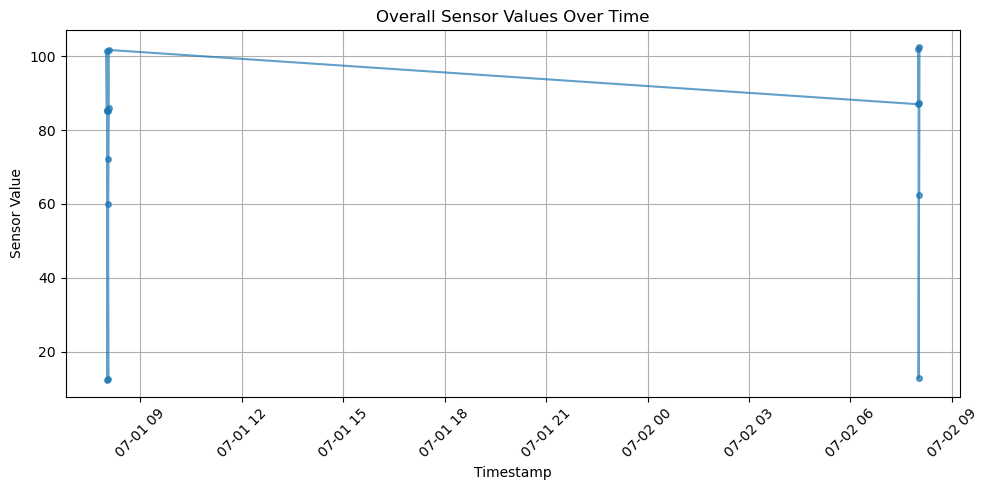

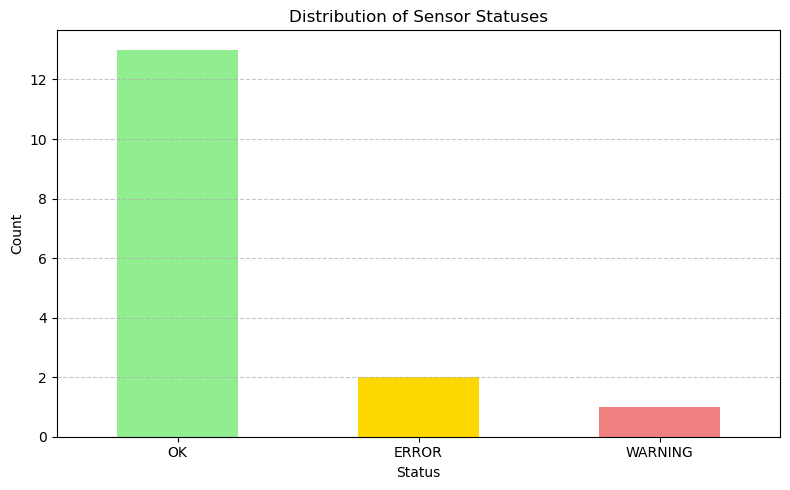

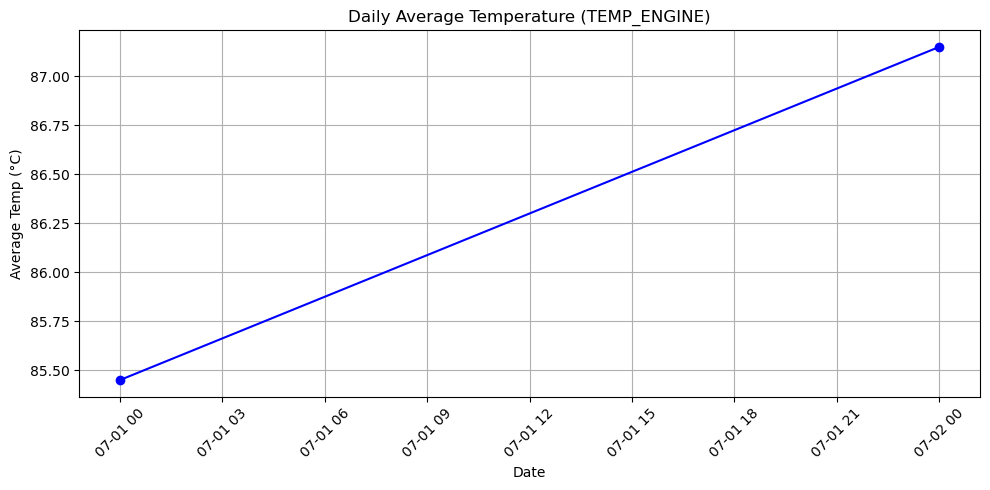


✅ Visualization complete. Plots displayed above.
🗑️ Clean-up: 'telemetry_data.csv' removed from your directory.


In [5]:
import matplotlib.pyplot as plt

print("\n--- Step 5: Data Visualization with Matplotlib ---")

# 🔹 5.1: Plot overall sensor value trends
plt.figure(figsize=(10, 5))
plt.plot(
    df_telemetry_cleaned.index,
    df_telemetry_cleaned['Value'],
    marker='o',
    linestyle='-',
    markersize=4,
    alpha=0.7
)
plt.title("Overall Sensor Values Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 5.2: Bar chart of sensor status distribution
plt.figure(figsize=(8, 5))
status_counts.plot(
    kind='bar',
    color=['lightgreen', 'gold', 'lightcoral']  # OK, WARNING, ERROR
)
plt.title("Distribution of Sensor Statuses")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🔹 5.3: Plot daily average engine temperature
plt.figure(figsize=(10, 5))
plt.plot(
    daily_avg_temp.index,
    daily_avg_temp.values,
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title("Daily Average Temperature (TEMP_ENGINE)")
plt.xlabel("Date")
plt.ylabel("Average Temp (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ Visualization complete. Plots displayed above.")

# 🔹 Clean up CSV (optional for demo purposes)
if os.path.exists(file_name):
    os.remove(file_name)
    print(f"🗑️ Clean-up: '{file_name}' removed from your directory.")
